# Risk AI workshop

These are the sumarised solutions of the workshop of Paul Larsen.

Authors: Špela Bernardič, Lea Holc, Petja Murnik

We have acquired 8 points, that is, $2^1$ from Artificial intelligence for risk management,
 $2^1 + 2^2$ from Discrete geometry for risk, 
 $2^1$ from Correlation and causality and
 $2^1$ from Adversarial regularization regimes in classification tasks. 

# Introduction-examples-exercises

In [2]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import xarray as xr

from fake_data_for_learning.contingency_tables import calculate_contingency_table

# Set (local) data directory
datadir = Path(os.getcwd()) / 'data'
path_or_url = datadir / 'default.csv'
if not path_or_url.exists():
    path_or_url = 'https://raw.githubusercontent.com/munichpavel/risk-ai-workshop/main/notebooks/data/default.csv'

df = pd.read_csv(path_or_url, sep=',')    

### Exercise: Data wrangling with pandas

Difficulty: (*)

Calculate the subpopulation ratio within the artifical [credit default data](https://github.com/munichpavel/risk-ai-workshop/blob/main/notebooks/data/default.csv) of 

* males among total population
* females of occupation 0 ("education") who default (default = 1) among total population
* males of occupation 0 ("education") who default (default=1) among total population

In [4]:
n_records = df.shape[0]
# prvo vprašanje
df = pd.read_csv(path_or_url, sep=',')
mask_male = df['gender'] == 1
subpopulation_ratio = sum(mask_male) / n_records
print(f'Male subpopulation ratio is {subpopulation_ratio}')

# drugo vprašanje
mask = ((df['gender'] == 0) & (df['occupation'] == 0) & (df['default']))
subpopulation_ratio = sum(mask) / n_records
print(f'females of occupation 0 who default among total population ratio is {subpopulation_ratio}')

# tretje vprašanje
mask = ((df['gender'] == 1) & (df['occupation'] == 0) & (df['default']))
subpopulation_ratio = sum(mask) / n_records
print(f'males of occupation 0 who default among total population ratio is {subpopulation_ratio}')

Male subpopulation ratio is 0.5143
females of occupation 0 who default among total population ratio is 0.1641
males of occupation 0 who default among total population ratio is 0.0618


# Probability-polytope-exercises

In [5]:
def get_simplex_sample_v1(ambient_dimension):
    """
    Get random element of the simplex of given ambient dimension

    Parameters
    ----------
    ambient_dimension : int

    Returns
    -------
    res : np.array
    """

    res = np.random.uniform(size=ambient_dimension)
    res = res / res.sum()

    return res


def get_simplex_sample_v2(ambient_dimension):
    """
    Get random element of the probability simplex

    Parameters
    ----------
    ambient_dimension : int

    Returns
    -------
    res : np.array
    """

    res = np.random.uniform(size=ambient_dimension-1)
    res = np.sort(res)
    res = np.insert(res, 0, 0)
    res = np.append(res, 1)
    res = np.diff(res)
    
    return res

### Probability polytopes exercise: probability simplex

* Describe in words and mathematical notation what the method `fake_data_for_learning.utils.get_simplex_sample` does. Difficulty: *

Answer the same questions for the following two versions. Be sure to consider more than one choice of ambient dimension.

ANSWER 1: So basically it calculates a random element in a simplex( its vertices are of a type (0,0,0,...,0,1,0,...,0), where length of this vector is the ambient_dimension)

* Test if the method `fake_data_for_learning.utils.get_simplex_sample` generates uniformly distributed samples from the probability simplex. Difficulty: **

Answer the same questions for the following two versions. Be sure to consider more than one choice of ambient dimension.

In [6]:
from scipy.stats import chi2_contingency

ambient_dimension = 4
n_samples = 1000
bins_per_dimension = 50

samples = np.array([get_simplex_sample_v1(ambient_dimension) for _ in range(n_samples)])

def test_uniformity_high_dim(samples, bins_per_dimension):
    """
    Test if the samples are uniformly distributed over the simplex without reducing dimensions.

    Parameters
    ----------
    samples : np.array
    bins_per_dimension : int
    
    Returns
    -------
    chi2 : float
    p_value : float
    """
    n_samples, ambient_dimension = samples.shape
    
    # Create multidimensional bins
    hist, edges = np.histogramdd(samples, bins=bins_per_dimension)
    
    # Flatten the histogram
    hist = hist.flatten()
    
    # Calculate the expected counts assuming uniform distribution
    expected_count = n_samples / len(hist)
    expected = np.full_like(hist, expected_count)
    
    # Perform the Chi-Square test
    chi2, p_value = chi2_contingency([hist, expected])[:2]
    
    return chi2, p_value

chi2, p_value = test_uniformity_high_dim(samples, bins_per_dimension)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Statistic: 1999.366500847868
P-Value: 1.0


ANSWER 2: For the values calculated above one can conclude that it really is uniformly distributed ( failed to reject the null hypothesis from the chi^2 test that it is not uniformly distributed)

# Causal-models-exercises

### Causal models exercise: do-calculus

As before, take K to be your Karma, H to be the hours you spend in the gym lifting weight, and then W be the weight you can bench press. 

You are the parent of a very young child, so Karma will punish you for devoting too much time to your triceps and neglecting your partner and baby. Let $G$ be this causal graph, as shown below.

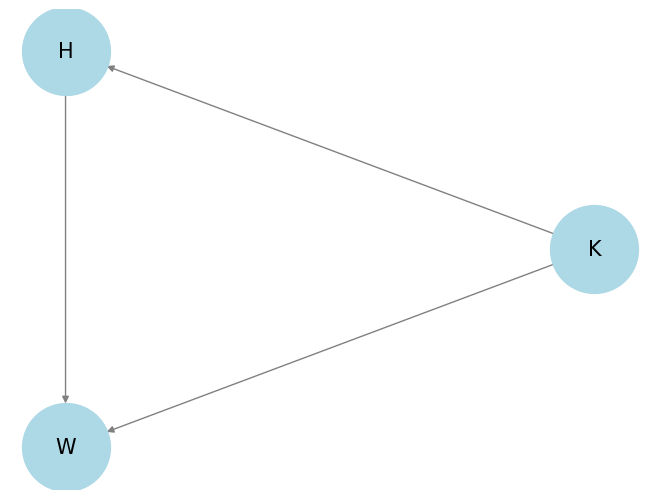

In [20]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

# Only needed to generate graphs, may be safely ommitted 
# once you comment out relevant cells below
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node('K')
G.add_node('H')
G.add_node('W')

# Add edges
G.add_edge('K', 'H')
G.add_edge('K', 'W')
G.add_edge('H', 'W')

# Draw the graph
pos = nx.circular_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=4000, font_size=15, font_color='black')

plt.show()



1. Draw the graphs $G_{\underline{W}}$ and $G_{\overline{H}}$. Difficulty: *

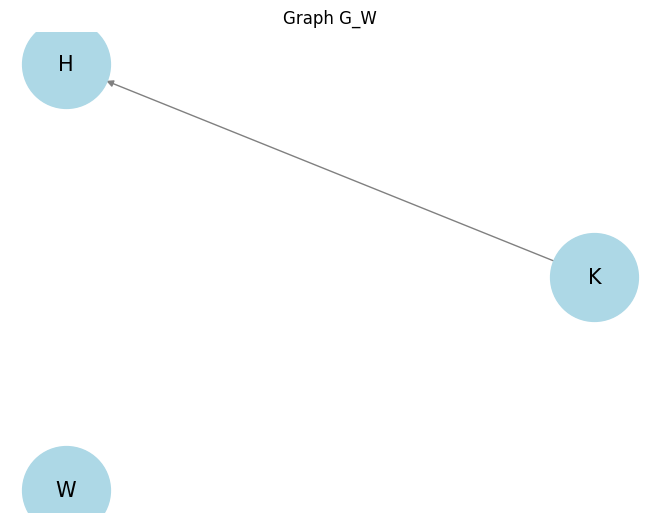

In [31]:
# Create a directed graph
G_W = nx.DiGraph()

# Add nodes
G_W.add_node('K')
G_W.add_node('H')
G_W.add_node('W')

# Add edges
G_W.add_edge('K', 'H')

# Draw the graph
pos = nx.circular_layout(G_W)  # Layout for better spacing
nx.draw(G_W, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=4000, font_size=15, font_color='black')
plt.title('Graph G_W')
plt.show()

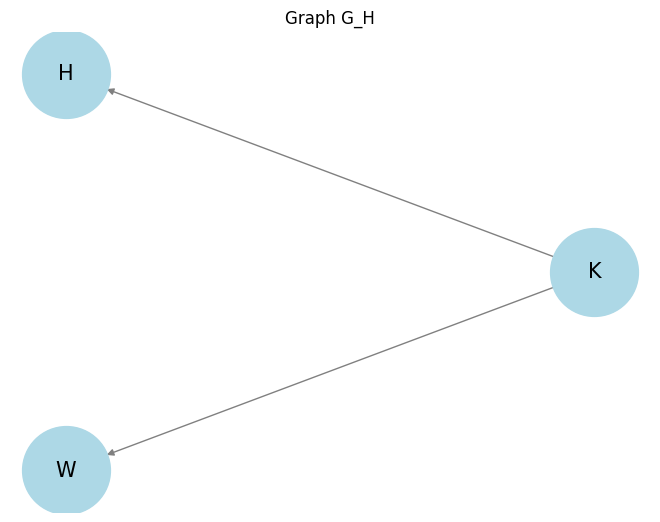

In [27]:
# Create a directed graph
G_H = nx.DiGraph()

# Add nodes
G_H.add_node('K')
G_H.add_node('H')
G_H.add_node('W')

# Add edges
G_H.add_edge('K', 'H')
G_H.add_edge('K', 'W')

# Draw the graph
pos = nx.circular_layout(G_H)  # Layout for better spacing
nx.draw(G_H, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=4000, font_size=15, font_color='black')
plt.title('Graph G_H')
plt.show()

# Adversarial-ml-examples-exercises

In [35]:
import os
from pathlib import Path

import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np

# from risk_learning.arr import (
#     convert_to_categorical,
#     make_feature_combination_array,
#     make_feature_combination_score_array,
#     make_trend_reports, 
#     make_data_trend_reports
# )

current_dir = Path(os.getcwd())
new_dir = Path(str(current_dir).replace('solution', 'notebooks'))
data_path = new_dir / 'data' / 'adversarial-default-for-x-validation.csv'
df = pd.read_csv(data_path)

# label_mapping_values = dict(gender=[0, 1], occupation=[0, 1])
# data_categories = label_mapping_values.copy()
# data_categories['default'] = [0, 1]
# df = convert_to_categorical(df, data_categories)

### Exercise: Simpson or not?

Difficulty: (*)

Prove that this dataset exhibites Simpson's paradox.

In [36]:
n_records = df.shape[0]

mask_100 = ((df['gender'] == 1) & (df['occupation'] == 0) & (df['default'] == 1)) 
mask_10_ = ((df['gender'] == 1) & (df['occupation'] == 0)) 
P_100_10_ = sum(mask_100) / sum(mask_10_) # verjetnost da si moski z ocupation 0 in defaultas med vsemi moskimi z ocupation 0

# enako samo da imas occupation 1
mask_110 = ((df['gender'] == 1) & (df['occupation'] == 1) & (df['default'] == 1)) 
mask_11_ = ((df['gender'] == 1) & (df['occupation'] == 1)) 
P_110_11_ = sum(mask_110) / sum(mask_11_) # verjetnost da si moski z ocupation 1 in defaultas med vsemi moskimi z ocupation 1

# enako samo da ne gledas ocupationa
mask_10 = ((df['gender'] == 1)  & (df['default'] == 1)) 
mask_1_ = ((df['gender'] == 1)) 
P_10__1_ = sum(mask_10) / sum(mask_1_) # verjetnost da si moski  in defaultas med vsemi moskimi 


## enako samo da si zenska

mask_000 = ((df['gender'] == 0) & (df['occupation'] == 0) & (df['default'] == 1)) 
mask_00_ = ((df['gender'] == 0) & (df['occupation'] == 0)) 
P_000_00_ = sum(mask_000) / sum(mask_00_) # verjetnost da si zenska z ocupation 0 in defaultas med vsemi zenskami z ocupation 0

# enako samo da imas occupation 1
mask_010 = ((df['gender'] == 0) & (df['occupation'] == 1) & (df['default'] == 1)) 
mask_01_ = ((df['gender'] == 0) & (df['occupation'] == 1)) 
P_010_01_ = sum(mask_010) / sum(mask_01_) # verjetnost da si zenska z ocupation 1 in defaultas med vsemi zenska z ocupation 1

# enako samo da ne gledas ocupationa
mask_00 = ((df['gender'] == 0)  & (df['default'] == 1)) 
mask_0_ = ((df['gender'] == 0)) 
P_00__0_ = sum(mask_00) / sum(mask_0_) # verjetnost da si zenska  in defaultas med vsemi zenskami 


tabela = pd.DataFrame( {'Ženske' :[P_000_00_, P_010_01_, P_00__0_],
                      'Moski': [P_100_10_, P_110_11_, P_10__1_]} ,  index=['occupation 0', 'occupation 1', 'occupation 0&1'])
tabela

,Ženske,Moski
occupation 0,0.770936,1.000000
occupation 1,0.045455,0.276471
occupation 0&1,0.733645,0.284884


In the table above, the proportions of defaults are calculated conditional on gender and occupation. For both occupations, the proportion of defaults is higher if you are male. In the third row, however, the proportion of defaults is calculated independently of occupation, where the proportion of defaults is higher for females. Therefore, we have a case of Simpson's paradox.